# Быстрое преобразование Фурье

1. Установите Jupyter и Python.
2. Для функции $f$ на диапазоне $[0, 10]$ с частотой дискретизации $100$ изготовьте код для построения графика f. Используйте matplotlib.
3. Реализуйте прямое и обратное дискретное преобразование Фурье FFT и FFTReverse на питоне за $O(n\log{n})$.
4. Подготовьте дискретизацию $f$ на отрезке $[0, T]$ - набор значений $f_i = f(x_i)$ в точках $x_i$, равномерно расположенных на отрезке $[0, T]$.
5. По функции $f = (f0, \ldots,f_{m-1})$ вычислите $g = FFT(f)$.
6. Вычислите $f_2 = FFTReverse(g)$.
7. Постройте график $f_2$.
8. Обнулите некоторую долю $D$ последних коэффициентов $g$. Обновите $f_2$ и ее график. Попробуйте несколько различных значений $D$.
9. Проведите эксперименты с функциями $f(x) = x, x^2, \sin{x}, sin{x^2}, \frac{\sin{x}}{x}$. Для каждой функции найдите долю $D$, для которой разница $$ и $f_2$ видна невооруженным глазом.


 Прямое преобразование Фурье

In [0]:
from math import pi, cos, sin


def FFT(vector):
    size = len(vector)
    size_halved = size // 2
    if size == 1:
        return vector
    
    vector_1 = FFT(vector[0::2])
    vector_2 = FFT(vector[1::2])
        
    degree = 2 * pi / size
    w = complex(1, 0)
    w_n = complex(cos(degree), sin(degree))
    
    transformed = [complex(0,0)] * size
    for i in range(size_halved):
        transformed[i] = complex(vector_1[i], 0) + w*vector_2[i]
        transformed[i + size_halved] = complex(vector_1[i], 0) - w*vector_2[i]
        w *= w_n
    
    return transformed

Обратное преобразование Фурье

In [0]:
def FFTReverse(vector):
    size = len(vector)
    size_halved = size // 2
    if size == 1:
        return vector
    
    vector_1 = FFTReverse(vector[0::2])
    vector_2 = FFTReverse(vector[1::2])
    
    degree = -2 * pi / size
    w = complex(1, 0)
    w_n = complex(cos(degree), sin(degree))
    
    transformed = [complex(0, 0)] * size
    for i in range(size_halved):
        transformed[i] = (complex(vector_1[i], 0) +  w*vector_2[i])/2
        transformed[i + size_halved] = (complex(vector_1[i], 0) -  w*vector_2[i])/2
        w *= w_n
    
    return transformed

Функция, рисующая график самой функции и её приближений

In [0]:
import matplotlib.pyplot as plt

def draw_FTT(func):
    X = [x/10 for x in range(256)]
    Y = [func(x) for x in X]
    transformed_Y = FFT(Y)

    plt.figure(figsize=(12, 12))
    plt.plot(X, Y, label='f(x)', linestyle='dashed', color='black', linewidth=3)
    for i in 0, 1, 2, 4, 8:
        plt.plot(X, FFTReverse(transformed_Y[:256-i] + [0]*i), label='{} zeroed'.format(i), linestyle='solid', linewidth=1)
    plt.legend()

## Эксперементы с разными функциями

$f(x) = x$

Функция значительно искажается даже при обнулении одного коофициента

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


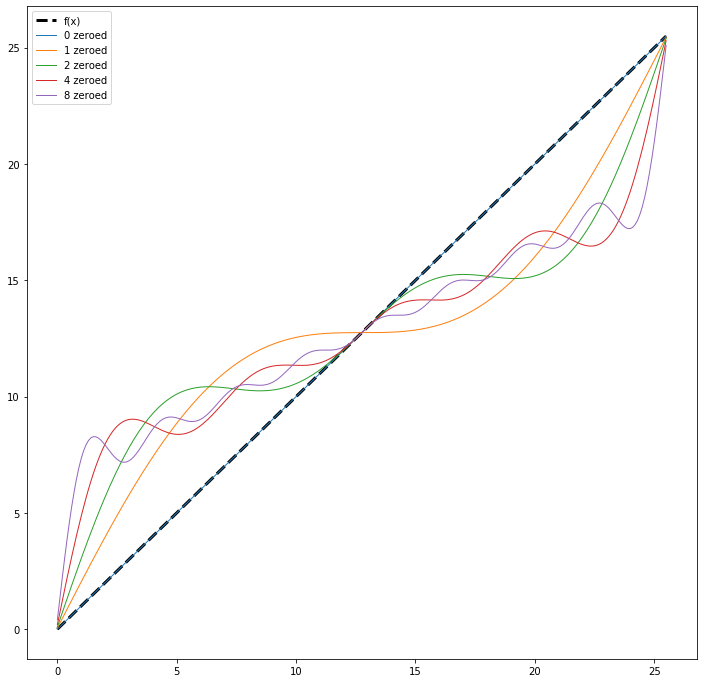

In [135]:
draw_FTT(lambda x: x)

$f(x) = x^2$

Функция значительно искажается даже при обнулении одного коофициента

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


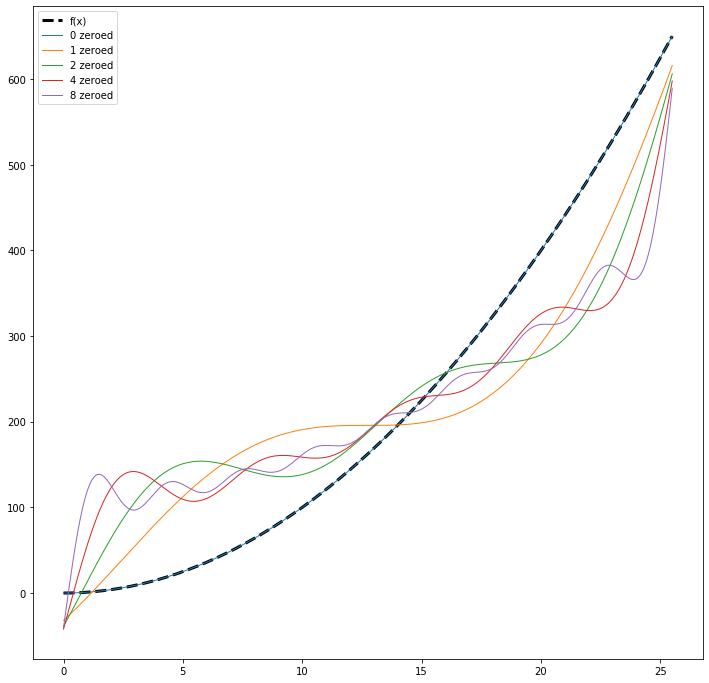

In [136]:
draw_FTT(lambda x: x**2)

$f(x) = \sin{x}$

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


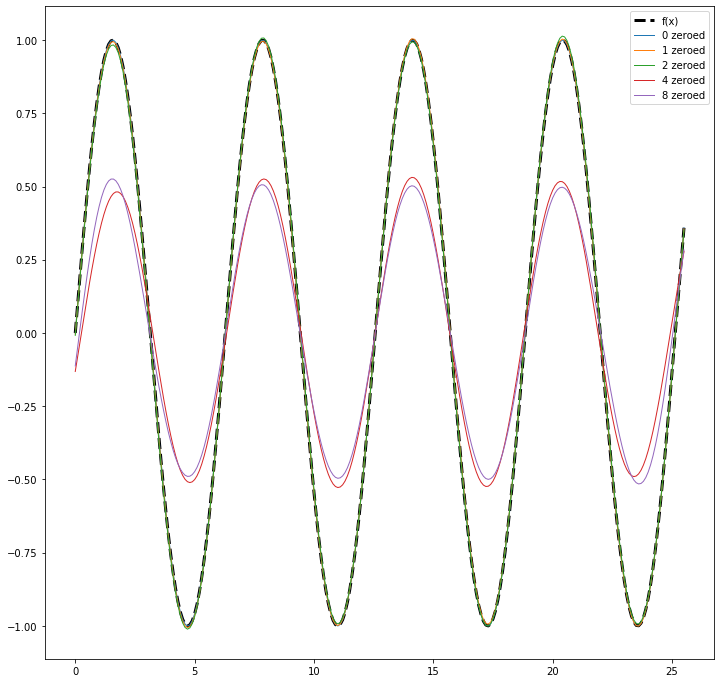

In [137]:
draw_FTT(lambda x: sin(x))

$f(x) = \sin{x^2}$

Функция искажается при обнулении ~восьми коофициентов, но при этом лишь теряет амплитуду, сохраняя общий вид

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


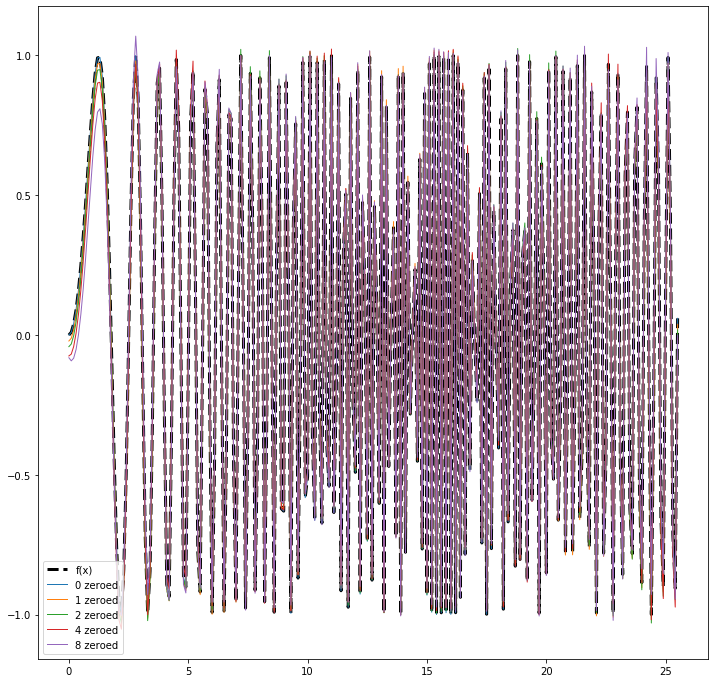

In [138]:
draw_FTT(lambda x: sin(x**2))

$f(x) = \frac{\sin{x}}{x}$

Функция искажается при обнулении одного коофициента, но сохраняет общий вид

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


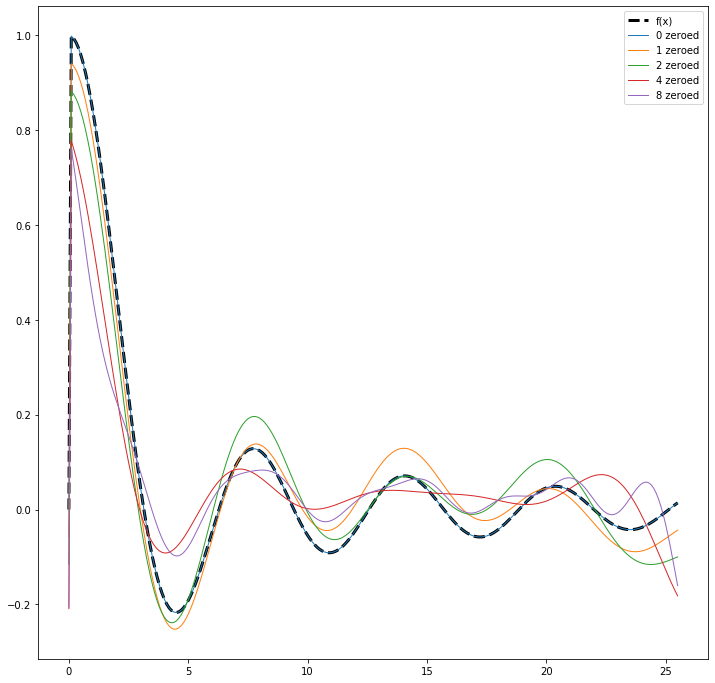

In [139]:
draw_FTT(lambda x: sin(x) / (x+1e-9))